In [42]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ourcodingclub/CC-time-series/master/monthly_milk.csv')

df.head()

,month,milk_prod_per_cow_kg
0,1962-01-01,265.05
1,1962-02-01,252.45
2,1962-03-01,288.00
3,1962-04-01,295.20
4,1962-05-01,327.15


## Question 1 (3 marks)    find first five values of time series data (Monthly milk)

In [43]:
df['milk_prod_per_cow_kg'].head()

,milk_prod_per_cow_kg
0,265.05
1,252.45
2,288.00
3,295.20
4,327.15


## Question 2 (12 marks) Fit ARIMA model in the time series data set and predict for 2 years.

In [5]:
! pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.2 MB/s eta 0:00:00


In [38]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")
model_fit = auto_arima(df['milk_prod_per_cow_kg'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

model_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=823.289, Time=0.59 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1075.573, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=843.201, Time=0.35 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=962.793, Time=0.36 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1203.299, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=870.000, Time=0.17 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=825.170, Time=0.77 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=825.147, Time=1.32 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=839.342, Time=0.54 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=5.20 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=826.588, Time=0.85 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=824.908, Time=2.67 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=824.202, Time=1.74 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1075.819, Time=0.27 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -406.460
Date:                              Mon, 02 Dec 2024   AIC                            822.921
Time:                                      16:33:53   BIC                            838.170
Sample:                                           0   HQIC                           829.114
                                              - 168                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7228      0.407      1.776      0.076      -0.075       1.520
ar.L1          0.7309      0.084      8.741      0.000       0.567       0.895
ar.L2          0.1888      0.080      2.359      0.018       0.032       0.346
ma.S.L12      -0.6167      0.073     -8.405      0.000      -0.761      -0.473
sigma2        10.2694      0.995     10.318      0.000       8.319      12.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.73
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.78
Prob(H) (two-sided):                  0.52   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = model_fit.order
seasonal_order = model_fit.seasonal_order

df['month'] = pd.to_datetime(df['month'])
df = df.set_index('month')

model = SARIMAX(df['milk_prod_per_cow_kg'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

predictions = results.predict(start = len(df), end = len(df)+23)

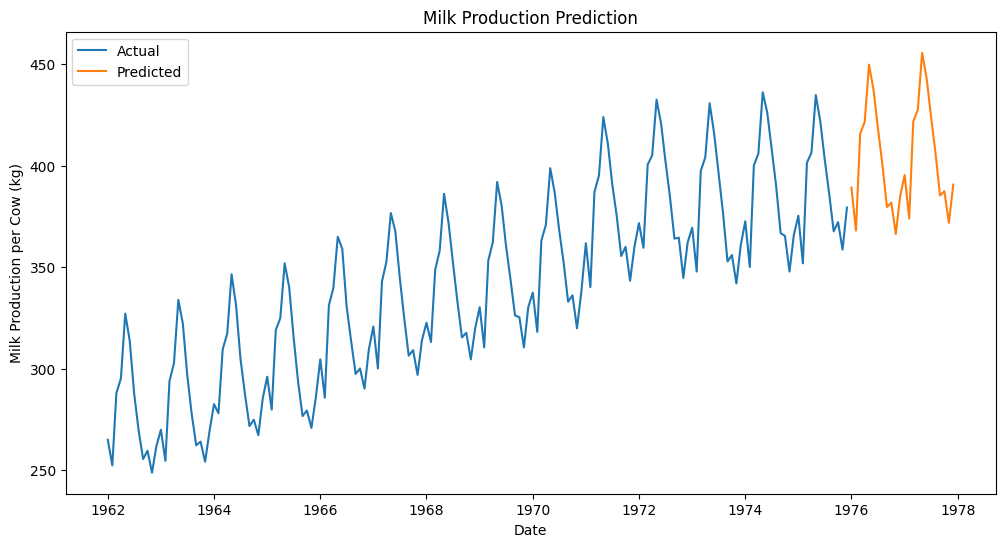

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['milk_prod_per_cow_kg'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Milk Production per Cow (kg)')
plt.title('Milk Production Prediction')
plt.show()